In [11]:
# Import necessary libraries
import os
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [3]:
# Load the dataset
def load_data(path):
    folders = os.listdir(path)
    x = []
    y = []
    for i, folder in enumerate(folders):
        files = os.listdir(os.path.join(path, folder))
        for file in files:
            img = io.imread(os.path.join(path, folder, file))
            if img is not None:
                x.append(img)
                y.append(i)
    x = np.array(x)
    y = np.array(y)
    return x, y

path = '/content/drive/MyDrive/EuroSAT/2750'
x, y = load_data(path)

In [4]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [5]:
img_size = (64, 64)
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test,y_test), callbacks=[early_stopping, checkpoint])

Epoch 1/30
296/296 [==============================] - ETA: 0s - loss: 1.2187 - accuracy: 0.5525
Epoch 1: val_accuracy improved from -inf to 0.65320, saving model to best_model.h5
296/296 [==============================] - 5s 18ms/step - loss: 1.2187 - accuracy: 0.5525 - val_loss: 0.9329 - val_accuracy: 0.6532
Epoch 2/30
292/296 [============================>.] - ETA: 0s - loss: 0.9875 - accuracy: 0.6489
Epoch 2: val_accuracy improved from 0.65320 to 0.68928, saving model to best_model.h5
296/296 [==============================] - 3s 12ms/step - loss: 0.9877 - accuracy: 0.6488 - val_loss: 0.8537 - val_accuracy: 0.6893
Epoch 3/30
291/296 [============================>.] - ETA: 0s - loss: 0.8718 - accuracy: 0.6946
Epoch 3: val_accuracy improved from 0.68928 to 0.71485, saving model to best_model.h5
296/296 [==============================] - 3s 11ms/step - loss: 0.8706 - accuracy: 0.6950 - val_loss: 0.7818 - val_accuracy: 0.7149
Epoch 4/30
296/296 [==============================] - ETA: 0s

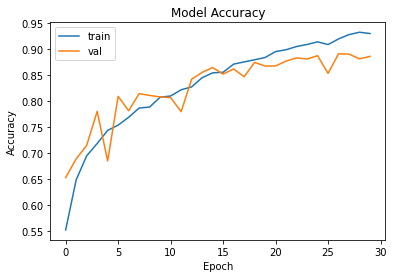

In [12]:
# Plot the learning curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

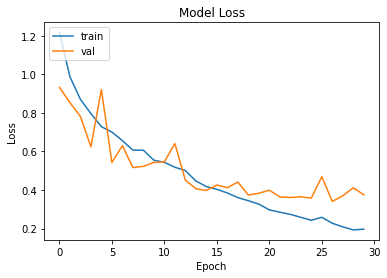

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()